In [561]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 
from collections import Counter

index = df.index
TOTAL = len(index)

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

path = "./Diaspora of Bosnia-Herzegovina_ Who returned and why_ (Responses).xlsx"

df = pd.read_excel(path, header = None) 

headers=["timestamp","DoB","gender","foreign_country",
          "returned_in_years","reason_for_leaving","edu_lvl_before_leaving",
          "edu_lvl_before_returning","immigrant_status","reason_for_returning",
          "personal_social_reason","children_factor","work_rank_bih",
          "work_rank_foreign","professional_growth","deployment_industry","return_decision",
          "move_back","missing_in_bih","future_in_bih"]

df.columns=headers
df.drop(df.head(2).index, inplace=True)
df.drop("timestamp", axis=1, inplace=True)

#calculating age
today = date.today() 
df['DoB'] = df['DoB'].astype('datetime64[ns]')
df['age'] = today.year- pd.DatetimeIndex(df['DoB']).year
df.drop('DoB', axis = 1, inplace=True)

#for column in missing_data.columns.values.tolist():
    #print(column)
    #print (missing_data[column].value_counts())
    #print("") 
    
   #filling all missing values with most frequent answ (only 2 now)
df = df.apply(lambda x:x.fillna(x.value_counts().index[0])) 
    
dummy_variable = pd.get_dummies(df["gender"])
dummy_variable.rename(columns={'gender':'male', 'gender':'female'}, inplace=True)
df = pd.concat([df, dummy_variable], axis=1)
#df.drop("gender", axis = 1, inplace=True)

df.gender = pd.Categorical(df.gender,['Male','Female'], ordered=False )
df.gender = df.gender.cat.codes

df.returned_in_years = pd.Categorical(df.returned_in_years,['x','1 year','2 years','3 years','4 years', '5 years','6 years','7 years','8 years','9 years','10 years or more'], ordered=True )
df.returned_in_years = df.returned_in_years.cat.codes

df.edu_lvl_before_leaving = pd.Categorical(df.edu_lvl_before_leaving,['Primary school','High school','Some college','University degree',"Master's of science/arts",'PhD' ], ordered=True )
df.edu_lvl_before_leaving = df.edu_lvl_before_leaving.cat.codes

df.edu_lvl_before_returning = pd.Categorical(df.edu_lvl_before_returning,['Primary school','High school','Some college','University degree',"Master's of science/arts",'PhD' ], ordered=True )
df.edu_lvl_before_returning = df.edu_lvl_before_returning.cat.codes

df.work_rank_bih = pd.Categorical(df.work_rank_bih,['Entry level','Junior management','Middle management','Senior management'], ordered=True )
df.work_rank_bih = df.work_rank_bih.cat.codes

df.work_rank_foreign = pd.Categorical(df.work_rank_foreign,['Entry level','Junior management','Middle management','Senior management'], ordered=True )
df.work_rank_foreign = df.work_rank_foreign.cat.codes

df.professional_growth = pd.Categorical(df.professional_growth,['Much better in the foreign country','Somewhat better in the foreign country','About equal','Somewhat better in Bosnia-Herzegovina','Much better in Bosnia-Herzegovina'], ordered=True )
df.professional_growth = df.professional_growth.cat.codes

df.return_decision = pd.Categorical(df.return_decision,['Very dissatisfied','Somewhat dissatisfied','Neutral','Somewhat satisfied','Very satisfied'], ordered=True )
df.return_decision = df.return_decision.cat.codes

df.move_back = pd.Categorical(df.move_back,['Very unlikely','Somewhat unlikely','Neither likely nor unlikely','Somewhat likely','Very likely'], ordered=True )
df.move_back = df.move_back.cat.codes

df.future_in_bih = pd.Categorical(df.future_in_bih,['Very pessimistic','Somewhat pessimistic','Neutral','Somewhat optimistic','Very optimistic'], ordered=True )
df.future_in_bih = df.future_in_bih.cat.codes

#df.to_csv('clean_df.csv')
plt.style.use('fivethirtyeight')

df.head(50)


,gender,foreign_country,returned_in_years,reason_for_leaving,edu_lvl_before_leaving,edu_lvl_before_returning,immigrant_status,reason_for_returning,personal_social_reason,children_factor,...,work_rank_foreign,professional_growth,deployment_industry,return_decision,move_back,missing_in_bih,future_in_bih,age,Female,Male
2,0,Germany,6,Lack of jobs in Bosnia-Herzegovina when I left,3,3,Student visa,Closeness to family and friends,General quality of life,I did not have the children at the time of ret...,...,1,1,IT/Computer engineering,3,0,Educational and learning opportunities in the ...,3,34,0,1
3,0,United States,3,Educational development,1,5,Student visa,Closeness to family and friends,Family and friends,I did not have the children at the time of ret...,...,0,0,IT/Computer engineering,3,2,A functional government and overall system in ...,3,38,0,1
4,1,United Kingdom,10,Educational development,3,4,Student visa,Closeness to family and friends,Family and friends,I did not have the children at the time of ret...,...,0,2,Educational,3,4,Quality of life in the foreign country,3,1,1,0
5,1,Other,1,The foreign country has better facilities and ...,5,5,Worker visa,Desire to help improve the state of affairs in...,Family and friends,Emotional growth of children,...,1,1,Educational,3,4,High salaries in the foreign country,3,40,1,0
6,1,United Kingdom,3,Educational development,4,4,Citizen,Closeness to family and friends,General quality of life,I did not have the children at the time of ret...,...,1,0,Educational,1,4,A functional government and overall system in ...,1,31,1,0
7,0,Denmark,10,"Unrest (i.e., aggression) in Bosnia-Herzegovina",0,5,Citizen,Lifestyle and quality of life in Bosnia-Herzeg...,General quality of life,I did not have the children at the time of ret...,...,2,0,Educational,3,2,A functional government and overall system in ...,3,42,0,1
8,1,Austria,1,Educational development,1,5,Worker visa,Desire to help improve the state of affairs in...,Family and friends,I did not have the children at the time of ret...,...,0,1,Educational,4,2,A functional government and overall system in ...,3,33,1,0
9,1,United Kingdom,10,Educational development,3,5,Student visa,Desire to help improve the state of affairs in...,Family and friends,I did not have the children at the time of ret...,...,2,0,Educational,4,4,Quality of life in the foreign country,1,40,1,0
10,1,Other,3,The political and societal climate in Bosnia-H...,3,4,Student visa,An attractive job offer in Bosnia-Herzegovina,My reasons for return were not personal/social,I did not have the children at the time of ret...,...,2,0,IT/Computer engineering,4,4,Educational and learning opportunities in the ...,3,35,1,0
11,1,Other,10,"Unrest (i.e., aggression) in Bosnia-Herzegovina",0,0,Some other type of visa,Closeness to family and friends,Family and friends,I did not have the children at the time of ret...,...,0,1,Educational,3,2,Quality of life in the foreign country,1,38,1,0


count    49.000000
mean     34.775510
std      15.784044
min       1.000000
25%      33.000000
50%      38.000000
75%      44.000000
max      65.000000
Name: age, dtype: float64

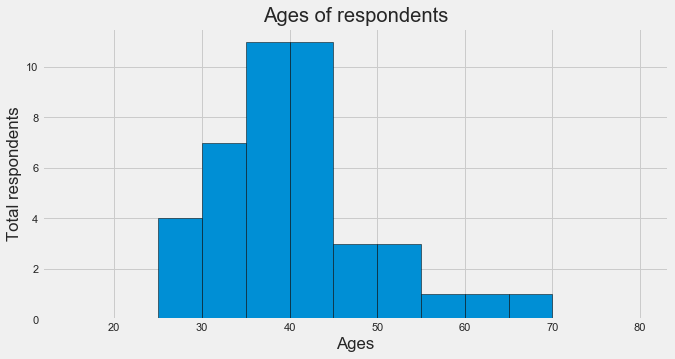

In [562]:
plt.title('Ages of respondents')
plt.xlabel('Ages')
plt.ylabel('Total respondents')

#disregarding everything below 15
bins=[15,20,25,30,35,40,45,50,55,60,65,70,75,80]
        
plt.hist(df['age'], bins=bins, edgecolor='black')
df['age'].describe()


Female   32  |  65 %
Male     17  |  35 %


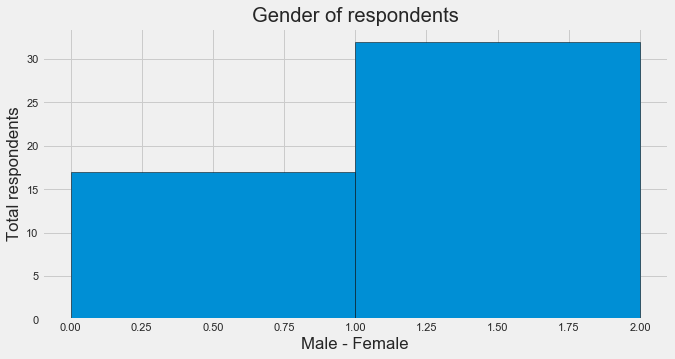

In [563]:
plt.title('Gender of respondents')
plt.xlabel('Male - Female')
plt.ylabel('Total respondents')

bins=[0,1,2]
plt.hist(df['gender'], bins=bins, edgecolor='black')
df['gender'].value_counts()



for val, cnt in df['gender'].value_counts().iteritems():
    if val == 1:
        print( 'Female  ', cnt, " | " , round(cnt/TOTAL*100),'%' )
    else:
        print( 'Male    ', cnt, " | " , round(cnt/TOTAL*100),'%')        

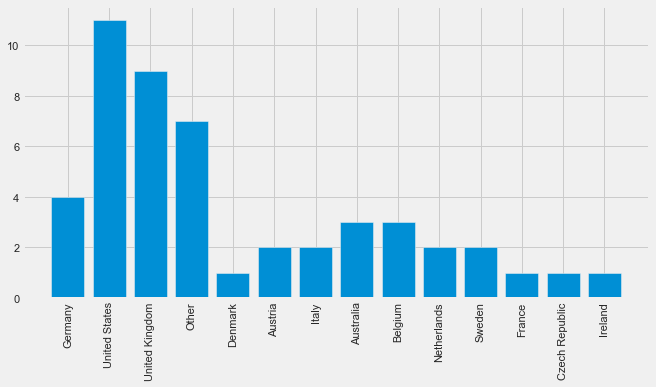

In [564]:
freqs = Counter(df['foreign_country'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='vertical')
plt.show() 




In [565]:

df['returned_in_years'].describe()


count    49.000000
mean      6.530612
std       3.611913
min       1.000000
25%       3.000000
50%       8.000000
75%      10.000000
max      10.000000
Name: returned_in_years, dtype: float64

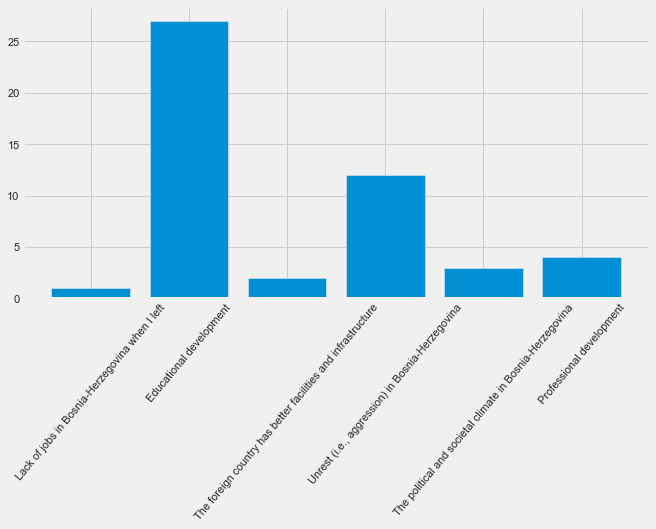

Educational development                                         55.102041
Unrest (i.e., aggression) in Bosnia-Herzegovina                 24.489796
Professional development                                         8.163265
The political and societal climate in Bosnia-Herzegovina         6.122449
The foreign country has better facilities and infrastructure     4.081633
Lack of jobs in Bosnia-Herzegovina when I left                   2.040816
Name: reason_for_leaving, dtype: float64

In [573]:
freqs = Counter(df['reason_for_leaving'])
xvals = range(len(freqs.values()))
plt.bar(xvals, freqs.values())
plt.xticks(xvals, freqs.keys(),rotation='50' )

plt.show() 

df.reason_for_leaving.value_counts(normalize=True)*100

In [582]:

print(" 0 - Primary school\n 1 - High school\n 2 - Some college\n 3 - University degree\n 4 - Master's of science/arts\n 5 - PhD\n")
df["edu_lvl_before_leaving"].describe()


 0 - Primary school
 1 - High school
 2 - Some college
 3 - University degree
 4 - Master's of science/arts
 5 - PhD



count    49.000000
mean      2.163265
std       1.490902
min       0.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: edu_lvl_before_leaving, dtype: float64

In [585]:
print(" 0 - Primary school\n 1 - High school\n 2 - Some college\n 3 - University degree\n 4 - Master's of science/arts\n 5 - PhD\n")
df["edu_lvl_before_returning"].describe()

 0 - Primary school
 1 - High school
 2 - Some college
 3 - University degree
 4 - Master's of science/arts
 5 - PhD



count    49.000000
mean      3.877551
std       1.129761
min       0.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: edu_lvl_before_returning, dtype: float64